In [1]:
from collections import defaultdict, Counter
from workflow.gunc.aggregate_max_css_level_merged import AggregateMaxCssLevelMerged
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from workflow.external.gtdb_metadata import GtdbMetadataR207

In [2]:
DF_META = GtdbMetadataR207().output().read_cached()
DF_META.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [3]:
DF_MAX_CSS = AggregateMaxCssLevelMerged().output().read_cached()
print(DF_MAX_CSS.shape)
DF_MAX_CSS.head()

(35723, 13)


,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,
GCA_000143435.1,2189,2110,4,genus,0.89,0.86,0.55,0.03,0.06,0.95,0.82,False,gtdb
GCA_000153745.1,2202,2165,2,family,0.92,0.90,0.49,0.06,0.12,0.67,0.61,False,progenomes
GCA_000155005.1,6879,6313,84,genus,0.87,0.79,0.79,0.10,0.22,0.97,0.77,False,gtdb
GCA_000161815.1,4499,4335,8,genus,0.80,0.77,0.50,0.19,0.50,0.95,0.74,False,progenomes
GCA_000166735.2,3414,3247,793,genus,0.94,0.90,0.57,0.02,0.05,0.93,0.83,False,progenomes


In [4]:
DF = DF_META.merge(DF_MAX_CSS, left_index=True, right_index=True, how='left')
DF.head()

,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from workflow.gunc_helper.aggregate_max_css_level_gunc import AggregateMaxCssLevelGtdbR95
from workflow.gunc_helper.aggregate_max_css_level_progenomes import AggregateMaxCssLevelProGenomes


def get_df():
    df_pro = AggregateMaxCssLevelProGenomes().output().read_cached()
    df_gtdb = AggregateMaxCssLevelGtdbR95().output().read_cached()
    df_meta = GtdbMetadataR207().output().read_cached()

    df_merged = df_pro.merge(df_gtdb, how='inner', left_index=True, right_index=True, suffixes=('_pro', '_gtdb'))
    df_merged = df_merged.merge(df_meta, how='inner', left_index=True, right_index=True)
    return df_merged

DF = get_df()

In [6]:
DF

,n_genes_called_pro,n_genes_mapped_pro,n_contigs_pro,taxonomic_level_pro,proportion_genes_retained_in_major_clades_pro,genes_retained_index_pro,clade_separation_score_pro,contamination_portion_pro,n_effective_surplus_clades_pro,mean_hit_identity_pro,...,gtdb_type_species_of_genus,ncbi_taxonomy,ncbi_taxonomy_unfiltered,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,5745,5627,3,kingdom,1.0,0.98,0.0,0.0,0.0,0.97,...,f,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacill...,d__Bacteria;x__Terrabacteria group;p__Firmicut...,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,2022,2016,1,kingdom,1.0,1.00,0.0,0.0,0.0,0.98,...,t,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria;p__Fusobacteria;c__Fusobacteriia;o...,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,4831,4724,1,kingdom,1.0,0.98,0.0,0.0,0.0,0.98,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,583,545,1,kingdom,1.0,0.93,0.0,0.0,0.0,0.98,...,t,d__Archaea;p__Nanoarchaeota;c__;o__Nanoarchaea...,d__Archaea;x__DPANN group;p__Nanoarchaeota;o__...,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,646,643,2,kingdom,1.0,1.00,0.0,0.0,0.0,0.97,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCF_910664815.1,4908,4805,1,kingdom,1.0,0.98,0.0,0.0,0.0,0.96,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli
GCF_910664825.1,4360,4327,1,kingdom,1.0,0.99,0.0,0.0,0.0,0.98,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli
GCF_910664845.1,5046,4937,1,kingdom,1.0,0.98,0.0,0.0,0.0,0.96,...,f,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales,f__Enterobacteriaceae,g__Escherichia,s__Escherichia coli


In [7]:
D_RANK = {'d': 'domain',
          'k': 'kingdom',
          'p': 'phylum',
          'c': 'class',
          'o': 'order',
          'f': 'family',
          'g': 'genus',
          's': 'species',
          'st': 'strain'}

In [8]:
def get_taxonomic_novelty_v3(df):

    # Get the number of taxa contained within each rank
    d_tax_under = defaultdict(lambda: 0)
    for taxonomy in df['gtdb_taxonomy'].values:
        for rank in taxonomy.split(';'):
            d_tax_under[rank] += 1

    # Process the rows
    tax_novelty = list()
    d_gid_to_tax_novelty = dict()
    for gid, row in df.iterrows():
        tax_str = row['gtdb_taxonomy']
        taxonomy = tax_str.split(';')
        last_rank = 'st'
        for taxon in reversed(taxonomy):
            taxon_count = d_tax_under[taxon]
            if taxon_count > 1:
                break
            last_rank = taxon[0]
        tax_novelty.append(D_RANK[last_rank])
        d_gid_to_tax_novelty[gid] = last_rank
    return d_gid_to_tax_novelty

In [9]:
def plot_taxonomic_novelty_for_dfs_v3():
    d_gid_to_novelty = get_taxonomic_novelty_v3(DF)
    print(f'Found novelty for {len(d_gid_to_novelty):,} gids')

    d_novelty_fail_union_gids = frozenset(DF[(DF['pass.GUNC_pro'] == False) | (DF['pass.GUNC_gtdb'] == False)].index)
    print(f'd_novelty_fail_union_gids = {len(d_novelty_fail_union_gids):,}')

    d_novelty_fail_int_gids = frozenset(DF[(DF['pass.GUNC_pro'] == False) & (DF['pass.GUNC_gtdb'] == False)].index)
    print(f'd_novelty_fail_int_gids = {len(d_novelty_fail_int_gids):,}')

    d_novelty_fail_pro_gids = frozenset(DF[DF['pass.GUNC_pro'] == False].index)
    print(f'd_novelty_fail_pro_gids = {len(d_novelty_fail_pro_gids):,}')

    d_novelty_fail_gtdb_gids = frozenset(DF[DF['pass.GUNC_gtdb'] == False].index)
    print(f'd_novelty_fail_gtdb_gids = {len(d_novelty_fail_gtdb_gids):,}')

    dicts = [
        ('all', frozenset(d_gid_to_novelty.keys())),
        ('union', d_novelty_fail_union_gids),
        ('int', d_novelty_fail_int_gids),
        ('pro', d_novelty_fail_pro_gids),
        ('r95', d_novelty_fail_gtdb_gids),
    ]

    denom = Counter(d_gid_to_novelty.values())

    rows = list()
    for k, set_gids in dicts:
        cur_ranks = Counter([d_gid_to_novelty[x] for x in set_gids])

        for rank, cnt in cur_ranks.items():
            cur_denom = denom[rank]
            rows.append({
                'source': k,
                'rank': rank,
                'count': cnt,
                'pct': 100 * (cnt / cur_denom)
                # 'pct': 100 * (cnt / cur_denom)
            })

    df = pd.DataFrame(rows)
    #
    # print()
    return df
#
DF_TAX_NOVELTY_V3 = plot_taxonomic_novelty_for_dfs_v3()
DF_TAX_NOVELTY_V3.head()

Found novelty for 317,542 gids
d_novelty_fail_union_gids = 35,723
d_novelty_fail_int_gids = 10,413
d_novelty_fail_pro_gids = 17,278
d_novelty_fail_gtdb_gids = 28,858


,source,rank,count,pct
0,all,s,36047,100.0
1,all,st,274374,100.0
2,all,f,814,100.0
3,all,o,263,100.0
4,all,g,5977,100.0


/var/folders/bp/jw5q113j0vj4pzdtdczxrltr0000gn/T/ipykernel_23112/3210593297.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks)


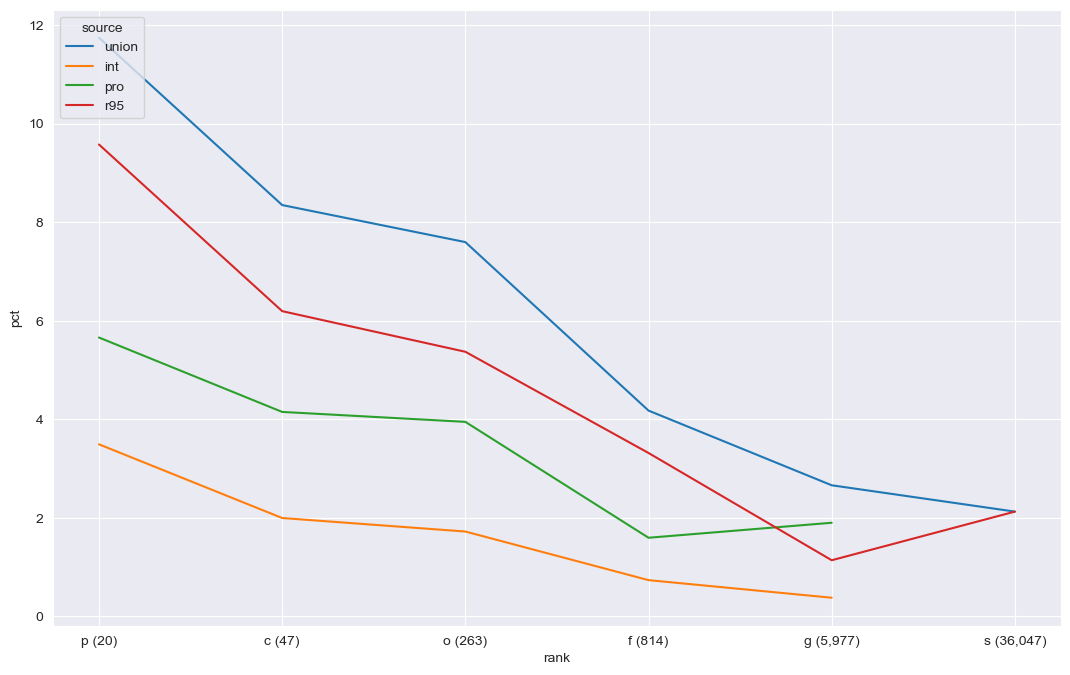

In [15]:
def plot_tax_novelty():
    ranks = ('p', 'c', 'o', 'f', 'g', 's', 'st')

    f, ax = plt.subplots(1, 1, figsize=(13, 8))

    use_data = DF_TAX_NOVELTY_V3[DF_TAX_NOVELTY_V3['source'] != 'all']

    sns.barplot(x="rank", y="pct", data=use_data, hue='source', ax=ax, order=('p', 'c', 'o', 'f', 'g', 's', 'st'))

    d_rank_to_cnt_r207 = dict()
    for rank in ranks:
        d_rank_to_cnt_r207[rank] = list(DF_TAX_NOVELTY_V3[(DF_TAX_NOVELTY_V3['source'] == 'all') & (DF_TAX_NOVELTY_V3['rank'] == rank)]['count'])[0]

    sns.move_legend(ax, "upper left")
    # for i, rank in zip(ax.containers, ranks):
    #     # ax.bar_label(i, fmt='%.1f', rotation='vertical', padding=5)
    #     ax.bar_label(i, labels=[f'{x:.1f}%' for x in i.datavalues], rotation=0, padding=2)


    x_ticks = list()
    for rank in ('p', 'c', 'o', 'f', 'g', 's', 'st'):
        cur_count = DF_TAX_NOVELTY_V3[(DF_TAX_NOVELTY_V3['source'] == 'all') & (DF_TAX_NOVELTY_V3['rank'] == rank)]
        if len(cur_count) == 0:
            cur_count = 0
        else:
            cur_count = int(list(cur_count['count'].values)[0])
        x_ticks.append(f'{rank} ({cur_count:,})')
    ax.set_xticklabels(x_ticks)

    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('/tmp/tax_novelty.svg')

    return

plot_tax_novelty()


/var/folders/bp/jw5q113j0vj4pzdtdczxrltr0000gn/T/ipykernel_23112/1923803544.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks)


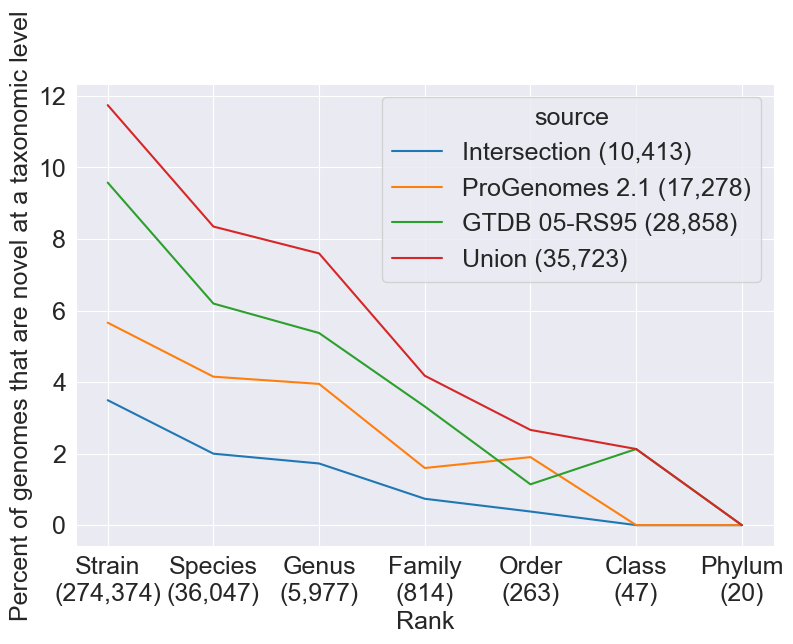

In [44]:
def plot_tax_novelty_line_plot():
    ranks = ('p', 'c', 'o', 'f', 'g', 's', 'st')

    f, ax = plt.subplots(1, 1, figsize=(9,6))

    use_data = DF_TAX_NOVELTY_V3[DF_TAX_NOVELTY_V3['source'] != 'all']

    rows_to_concat = list()
    for rank in ranks:
        for source in ('union', 'int', 'pro', 'r95'):
            tmp_rows = use_data[(use_data['source'] == source) & (use_data['rank'] == rank)]
            if len(tmp_rows) == 0:
                rows_to_concat.append({'source': source, 'rank': rank, 'count': 0, 'pct': 0})
    use_data = pd.concat([pd.DataFrame(rows_to_concat), use_data])

    use_data['ordering'] = use_data['rank'].apply(lambda x: -ranks.index(x))
    use_data.sort_values(by=['source', 'ordering'], inplace=True)

    # Rename sources
    d_source_to_new_name = {'union': 'Union (35,723)', 'int': 'Intersection (10,413)', 'pro': 'ProGenomes 2.1 (17,278)', 'r95': 'GTDB 05-RS95 (28,858)', 'all': 'all'}
    use_data['source'] = use_data['source'].apply(lambda x: d_source_to_new_name[x])

    sns.lineplot(x="rank", y="pct", data=use_data, hue='source', ax=ax)

    d_rank_to_cnt_r207 = dict()
    for rank in ranks:
        d_rank_to_cnt_r207[rank] = list(DF_TAX_NOVELTY_V3[(DF_TAX_NOVELTY_V3['source'] == 'all') & (DF_TAX_NOVELTY_V3['rank'] == rank)]['count'])[0]

    sns.move_legend(ax, "upper right")
    # for i, rank in zip(ax.containers, ranks):
    #     # ax.bar_label(i, fmt='%.1f', rotation='vertical', padding=5)
    #     ax.bar_label(i, labels=[f'{x:.1f}%' for x in i.datavalues], rotation=0, padding=2)


    x_ticks = list()
    rank_to_name = {'p': 'Phylum', 'c': 'Class', 'o': 'Order', 'f': 'Family', 'g': 'Genus', 's': 'Species', 'st': 'Strain'}
    for rank in reversed(('p', 'c', 'o', 'f', 'g', 's', 'st')):
        cur_count = DF_TAX_NOVELTY_V3[(DF_TAX_NOVELTY_V3['source'] == 'all') & (DF_TAX_NOVELTY_V3['rank'] == rank)]
        if len(cur_count) == 0:
            cur_count = 0
        else:
            cur_count = int(list(cur_count['count'].values)[0])
        x_ticks.append(f'{rank_to_name[rank]}\n({cur_count:,})')
    ax.set_xticklabels(x_ticks)

    ax.set_ylabel('Percent of genomes that are novel at a taxonomic level')
    ax.set_xlabel('Rank')

    plt.rcParams.update({'font.size': 18})
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('/tmp/tax_novelty.svg')

    return

plot_tax_novelty_line_plot()


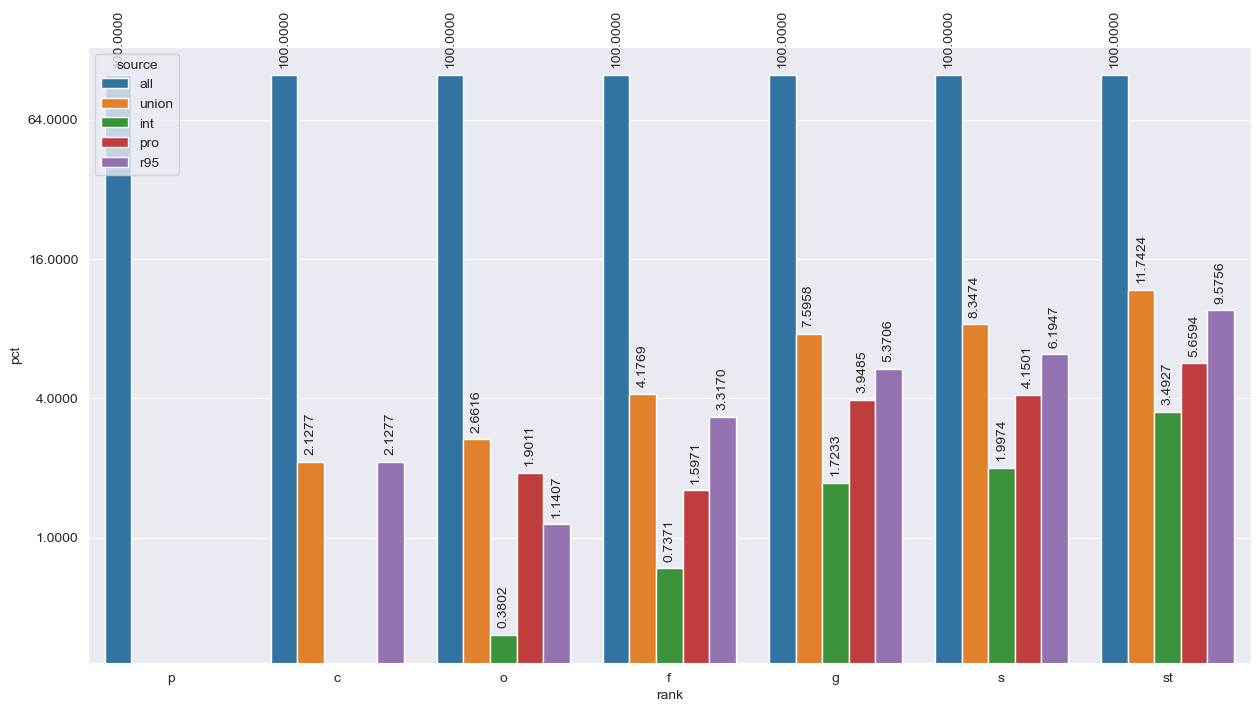

In [11]:
def plot_tax_novelty_pct_log():

    f, ax = plt.subplots(1, 1, figsize=(15, 8))

    sns.barplot(x="rank", y="pct", data=DF_TAX_NOVELTY_V3, hue='source', ax=ax, order=('p', 'c', 'o', 'f', 'g', 's', 'st'))
    sns.move_legend(ax, "upper left")
    # ax.set_ylim(0, 100)

    plt.yscale('log', base=2)
    from matplotlib.ticker import StrMethodFormatter, NullFormatter
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.4f}'))
    ax.yaxis.set_minor_formatter(NullFormatter())

    # plt.ylim(0.000001, 256)

    for i in ax.containers:
        ax.bar_label(i, labels=[f'{x:,.4f}' for x in i.datavalues], rotation=90, padding=5)





    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('/tmp/tax_novelty.svg')

    return

plot_tax_novelty_pct_log()


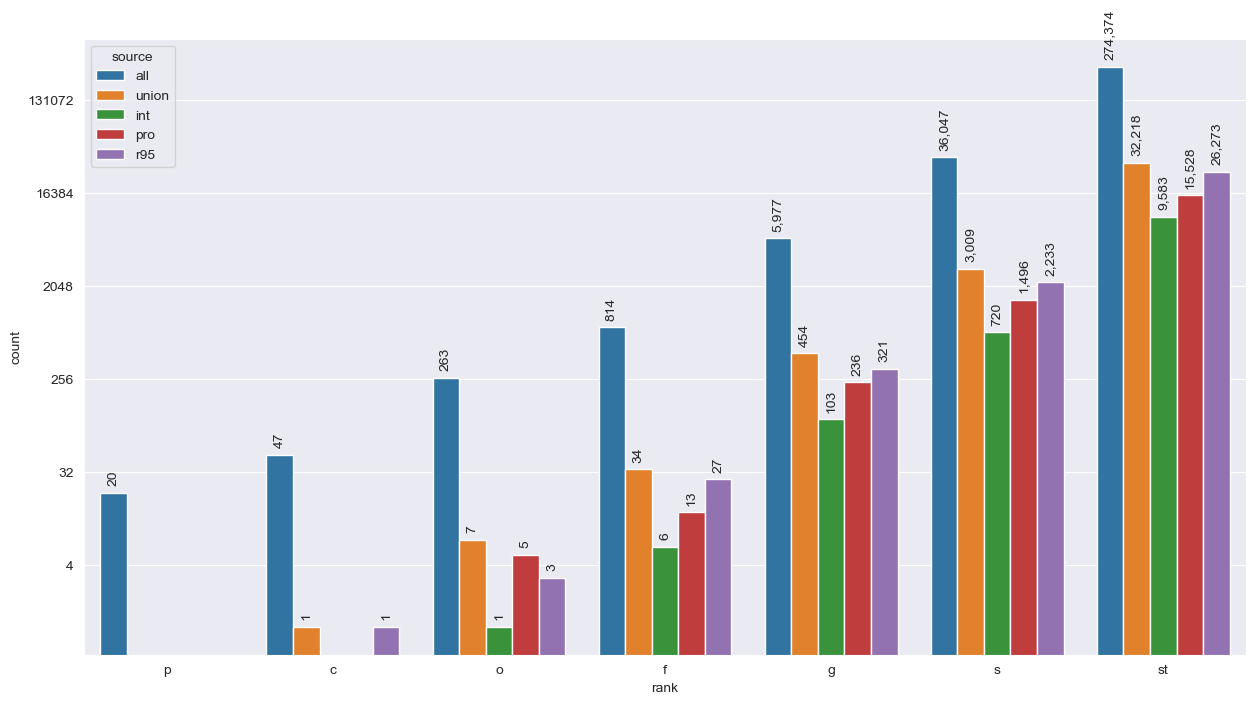

In [12]:
def plot_tax_novelty_log():

    f, ax = plt.subplots(1, 1, figsize=(15, 8))

    sns.barplot(x="rank", y="count", data=DF_TAX_NOVELTY_V3, hue='source', ax=ax, order=('p', 'c', 'o', 'f', 'g', 's', 'st'))
    sns.move_legend(ax, "upper left")
    # ax.set_ylim(0, 10e10)

    plt.yscale('log', base=2)
    from matplotlib.ticker import StrMethodFormatter, NullFormatter
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
    ax.yaxis.set_minor_formatter(NullFormatter())

    for i in ax.containers:
        ax.bar_label(i, labels=[f'{x:,.0f}' for x in i.datavalues], rotation=90, padding=5)

    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('/tmp/tax_novelty.svg')

    return

plot_tax_novelty_log()
